# Fontes

* https://www.nltk.org/howto/portuguese_en.html
* https://www.youtube.com/watch?v=jMN1XbMRE6s

# Lendo e pré-processando 

In [1]:
# ok, depois descobri que toda a obra do machado de assis pode ser baixada pelo nltk 
#   from nltk.corpus import machado
#   rs
with open('../books/dom_casmurro.txt', encoding='utf-8') as f:
    dom_casmurro = f.read()
    

print(dom_casmurro[:500])

                                  Dom Casmurro

                                                                             Texto de referência:
                                                     Obras Completas de Machado de Assis, vol. I,
                                                              Nova Aguilar, Rio de Janeiro, 1994.


                                Publicado originalmente pela Editora Garnier, Rio de Janeiro, 1899.




                             CAPÍTULO PRIMEIRO
     


In [2]:
import re

# usado para remover quebras de linhas entre palavras (diferente de quebras de linhas entre parágrafos ou diálogos)
RE_BL_BETWEEN_WORDS = re.compile(r'(\b|;|,)\n\b')
# usado para extrair o texto estruturado em capítulo, título e conteúdo, dividindo em seus capítulos
RE_CAPITULO = re.compile(r'CAPÍTULO\ (?P<numero>\w+)\s+(?P<titulo>.+?)\n(?P<conteudo>.*?(?=CAPÍTULO|$))', re.DOTALL)

def clean(text):
    
    return RE_BL_BETWEEN_WORDS.sub(' ', text).strip()

In [3]:
dom_casmurro_capitulos = [
    {
        'capitulo': m.group('numero'),
        'titulo': m.group('titulo'),
        'conteudo': clean(m.group('conteudo'))
    }
    for m in RE_CAPITULO.finditer(dom_casmurro)
]

print(dom_casmurro_capitulos[5]['conteudo'])

Tio Cosme vivia com minha mãe, desde que ela enviuvou. Já então era viúvo como prima Justina; era a casa dos três viúvos.

A fortuna troca muita vez as mãos à natureza. Formado para as serenas funções do capitalismo, tio Cosme não enriquecia no foro: ia comendo. Tinha o escritório na antiga rua das Violas, perto do júri, que era no extinto Aljube. Trabalhava no crime. José Dias não perdia as defesas orais de tio Cosme. Era quem lhe vestia e despia a toga, com muitos cumprimentos no fim. Em casa, referia os debates. Tio Cosme, por mais modesto que quisesse ser, sorria de persuasão.

Era gordo e pesado, tinha a respiração curta e os olhos dorminhocos. Uma das minhas recordações mais antigas era vê-lo montar todas as manhãs a besta que minha mãe lhe deu e que o levava ao escritório. O preto que a tinha ido buscar à cocheira, segurava o freio, enquanto ele erguia o pé e pousava no estribo; a isto seguia-se um minuto de descanso ou reflexão. Depois, dava um impulso, o primeiro, o corpo amea

# Separando em tokens e analisando

In [54]:
import nltk

# lista de tokens gerados com a tokenização do conteúdo dos capítulos
for ch in dom_casmurro_capitulos:
    ch['tokens'] = nltk.tokenize.word_tokenize(ch['conteudo'], language='portuguese')
    
dom_casmurro_tokens = [
    token for ch in dom_casmurro_capitulos
          for token in ch['tokens']
]

In [5]:
# transforma lista de tokens em objeto nltk.Text, útil para análises com nltk
# https://www.nltk.org/api/nltk.text.html#nltk.text.Text
dom_casmurro_txt = nltk.Text(dom_casmurro_tokens)

In [56]:
# concordance é utilizado para apresentar ocorrências de tokens em seu contexto

dom_casmurro_txt.concordance('olhos')

Displaying 25 of 162 matches:
, como eu estava cansado , fechei os olhos três ou quatro vezes ; tanto bastou 
 ponto as bochechas , os dentes , os olhos , toda a cara , toda a pessoa , todo
sado , tinha a respiração curta e os olhos dorminhocos . Uma das minhas recorda
eleira grande ; o retrato mostra uns olhos redondos , que me acompanham para to
ria e Pandora me aborrecem , ergo os olhos para eles , e esqueço os bilhetes br
 reparasse no padre , não tirasse os olhos do padre . Em casa , brincava de mis
, mas não achei língua . Todo eu era olhos e coração , um coração que desta vez
 pela boca fora . Não podia tirar os olhos daquela criatura de quatorze anos , 
 desciam-lhe pelas costas . Morena , olhos claros e grandes , nariz reto e comp
Voltei-me para ela ; Capitu tinha os olhos no chão . Ergueu-os logo , devagar ,
ir de cansadas ou de esquecidas . Os olhos fitavam-se e desfitavam-se , e depoi
 , mas uma só criatura seráfica . Os olhos continuaram a dizer coisas infinitas
quer ver ?

In [72]:
# collocation são tokens que aparecem juntos
dom_casmurro_txt.collocation_list()

[('José', 'Dias'),
 ('minha', 'mãe'),
 ('prima', 'Justina'),
 ('tio', 'Cosme'),
 ('Minha', 'mãe'),
 ('que', 'não'),
 ('Padre', 'Cabral'),
 ('Tio', 'Cosme'),
 ('Prima', 'Justina'),
 ('outra', 'vez'),
 ('alguma', 'coisa'),
 ('pode', 'ser'),
 ('uma', 'vez'),
 ('outra', 'coisa'),
 ('muita', 'vez'),
 ('para', 'mim'),
 ('não', 'sei'),
 ('alguns', 'instantes'),
 ('dia', 'seguinte'),
 ('Engenho', 'Novo')]

In [77]:
# tokens que aparecem após 'Capitu'
dom_casmurro_txt.findall('<Capitu> (<.*>)')

fez; e; ,; a; chamava-me; abanava; um; ,; !; amava-me; !; e; adoeciam;
.; !; estava; agarrou-me; tinha; ,; foi; !; riscava; respondeu; .; ,;
e; e; queria; ,; não; gostava; não; do; refletia; estava; deixou-se;
.; recusou; ,; ,; ;; .; repetiu-os; :; tem; .; .; ,; ,; e; .; .; .; ,;
ia; preferia; quis; era; ,; dão; confessou-me; ,; obedecia; quis; não;
.; .; ,; .; .; .; deixou-se; .; ,; deu-me; ?; derreou; !; ergueu-se;
tinha; compôs-se; ,; fechava-me; ...; .; ,; .; recuou; eram; refletiu;
,; ,; iniciou; ,; abre; ,; ,; não; repetiu-lhe; com; ,; ia; ,; não; .;
que; segredou-me; .; .; ,; ,; despedia-se; respondeu; confirmou;
ouvia-me; olhava; ,; tornou; ,; refletia; fez; deixassem; foi; tornou;
;; falou; quando; olhou; !; teve; limitou-se; ,; falou; ,; sorria;
fitou-me; alegava; ,; não; ,; não; ,; temia; deu-me; uma; ,; ao; ,; ;;
.; como; ,; ,; ,; confirmava; e; ,; ,; dava-me; inclinou-se; refreou-
me; !; ,; cheia; fez-se; lhe; que; sorriu; ,; ia; ia; ,; fê-la; ,;
usava; lhe; ,; ,; e; .; ,;

# Narrative time

In [80]:
s = pd.Series([1, 2])

In [81]:
s

0    1
1    2
dtype: int64

In [82]:
s.index

RangeIndex(start=0, stop=2, step=1)

In [105]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# calcula a posição dos tokens iniciais e finais de cada capítulo, para definir os bins

bins = [0] + np.cumsum([len(ch['tokens']) for ch in dom_casmurro_capitulos])

titulos = [ch['titulo'] for ch in dom_casmurro_capitulos]


def plot_narrative_time(words, n_chapters=40):
    word_bins = {}
    
    for w in words:
        idxs = [i for i, token in enumerate(dom_casmurro_tokens) if token == w]
        binned = pd.cut(idxs, bins[:n_chapters + 1]).value_counts()
        binned.index = titulos[:n_chapters]
        
        word_bins[w] = binned
    
    pd.DataFrame(word_bins).plot(kind='barh', figsize=(10, 20))

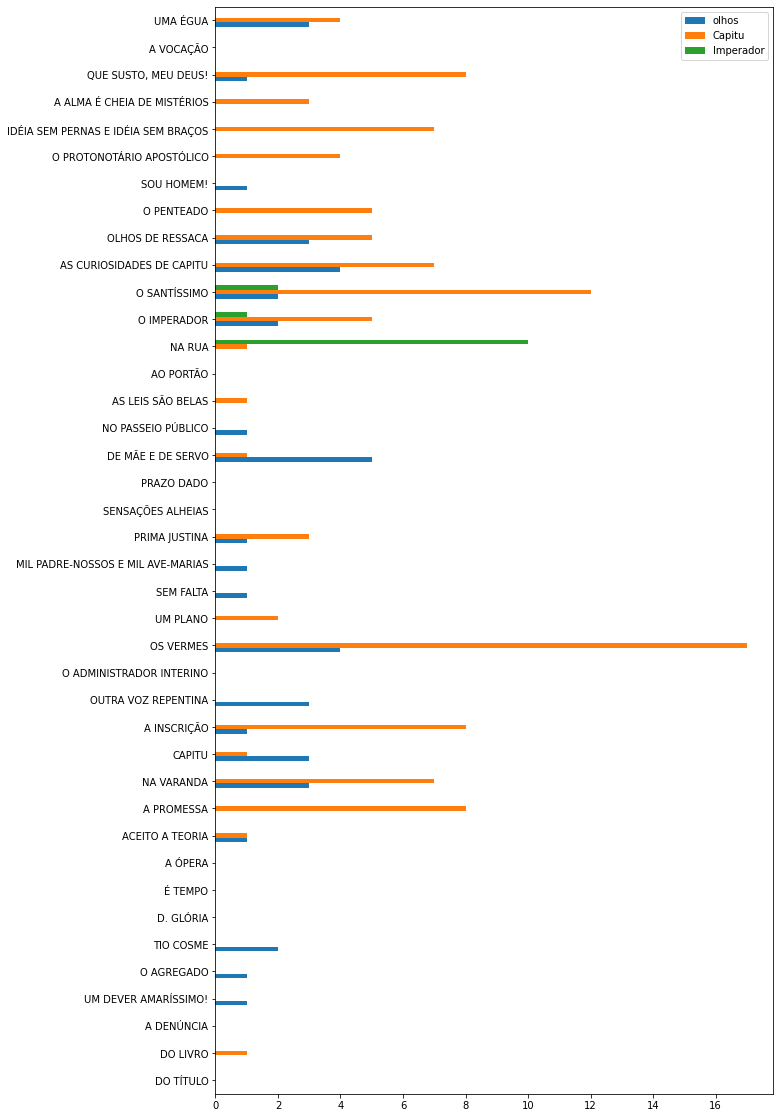

In [106]:
plot_narrative_time(['olhos', 'Capitu', 'Imperador'])